In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [23]:
y[0:9]

0    1
1    0
2    1
3    4
4    0
5    0
6    7
7    3
8    5
Name: label, dtype: int64

In [6]:
x.shape,y.shape

((42000, 784), (42000,))

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(x)

StandardScaler()

In [29]:
x = scaler.fit_transform(x)
test = scaler.fit_transform(test)

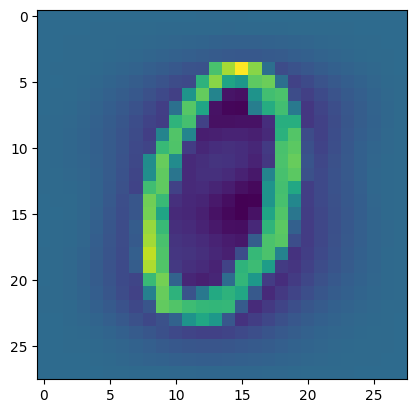

In [17]:
plt.imshow(x[5].reshape(28,28))

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=200)

In [18]:
pca.fit(x)

PCA(n_components=200)

In [30]:
x = pca.fit_transform(x)
test = pca.fit_transform(test)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier()

In [24]:
knn.fit(x,y)

KNeighborsClassifier()

In [34]:
test0 = pd.read_csv('test.csv')

In [26]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


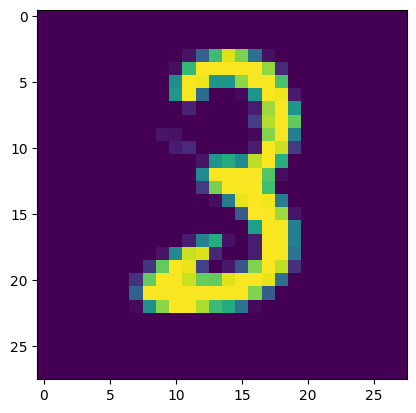

In [35]:
plt.imshow(test0.iloc[4,0:].values.reshape(28,28))

In [31]:
y_pred = knn.predict(test)

In [36]:
y_pred[4]

3

In [38]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2)

In [42]:
x_test.shape,y_test.shape

((8400, 784), (8400,))

In [48]:
x_test = scaler.fit_transform(x_test)
x_train = scaler.fit_transform(x_train)

In [44]:
x_test = pca.fit_transform(x_test)

In [45]:
y_pred = knn.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score

In [46]:
print(accuracy_score(y_test,y_pred))

0.7646428571428572


In [49]:
for i in range(1,785):
    pca = PCA(n_components=i)
    x_train_trf = pca.fit_transform(x_train)
    x_test_trf = pca.fit_transform(x_test)
    knn.fit(x_train_trf,y_train)
    y_pred = knn.predict(x_test_trf)
    print(accuracy_score(y_test,y_pred))

0.2569047619047619
0.32702380952380955
0.5125
0.655
0.7320238095238095
0.8195238095238095
0.8332142857142857
0.8647619047619047
0.8772619047619048
0.8982142857142857
0.9073809523809524
0.8575
0.7794047619047619
0.775952380952381
0.7866666666666666
0.7970238095238096
0.7322619047619048
0.7985714285714286
0.8054761904761905
0.8176190476190476
0.8177380952380953
0.7845238095238095
0.8289285714285715
0.7922619047619047
0.7875
0.7802380952380953
0.7653571428571428
0.7913095238095238
0.7726190476190476
0.784047619047619
0.7761904761904762
0.7880952380952381
0.7576190476190476
0.7638095238095238
0.7564285714285715
0.7808333333333334
0.7659523809523809
0.7728571428571429
0.7547619047619047
0.7638095238095238
0.775
0.7710714285714285
0.7516666666666667


KeyboardInterrupt: 

## As seen above we know that pca components play keen role for accuracy in model training